# Interior Design

# Custom Dataset

## Scraping data for 8 classes

In [0]:
!pip install google_images_download
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64

In [0]:
chromedriver_path = '/gdrive/../content/chromedriver'

In [0]:
#queries = ["scandinavian interior design", "scandinavian living room", "scandinavian apartment", "scandinavian kitchen", "scandinavian bathroom", "scandinavian bedroom"]
#queries = ["bohemian interior design", "bohemian living room", "bohemian apartment", "bohemian kitchen", "bohemian bathroom", "bohemian bedroom"]
#queries = ["coastal interior design", "coastal living room", "coastal apartment", "coastal kitchen", "coastal bathroom", "coastal bedroom"]
#queries = ["industrial interior design", "industrial living room", "industrial apartment", "industrial kitchen", "industrial bathroom", "industrial bedroom"]
#queries = ["minimalist interior design", "minimalist living room", "minimalist apartment", "minimalist kitchen", "minimalist bathroom", "minimalist bedroom"]
#queries = ["eclectic interior design", "eclectic living room", "eclectic apartment", "eclectic kitchen", "eclectic bathroom", "eclectic bedroom"]
#queries = ["glam interior design", "glam living room", "glam apartment", "glam kitchen", "glam bathroom", "glam bedroom"]
queries = ["classic interior design", "classic living room", "classic apartment", "classic kitchen", "classic bathroom", "classic bedroom"]

In [0]:
from google_images_download import google_images_download   #importing the library

for q in queries:
    keyws   = q
    limit   = 100
    chromedriver = chromedriver_path
    offset  = None  # how many links to skip
    color_type	= 'full-color'# color type you want to apply to the images.[full-color, black-and-white, transparent]
    size    = None  #relative size of the image to be downloaded. [large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP]
    usage_rights	= None #Very important! Check the doc

    arguments = {
            "keywords" : keyws,
            "limit" :limit,
            "chromedriver":chromedriver,
            "offset" : offset,
            "color_type" : color_type,
            "size" : size,
            "usage_rights" : usage_rights
            }   #creating list of arguments
    response  = google_images_download.googleimagesdownload()   #class instantiation
    response.download(arguments)  


Item no.: 1 --> Item name = classic interior design
Evaluating...
Starting Download...
Completed Image ====> 1.1920x1080resize_interior16219_48_1369797769.jpg
Completed Image ====> 2.de53a6380e09919f09a65dda27173e08.jpg
Completed Image ====> 3.2-classic-parisian-apartment-contemporary-interior-design-1-1150x600.jpg
Completed Image ====> 4.familyroom_gn.jpg
Completed Image ====> 5.classic_room_by_5tarfish.jpg
Completed Image ====> 6.Modern_Classic_Retro_Glam.jpg
Completed Image ====> 7.80f877332ee9f2a2c0c013131dd7a917.jpg
Completed Image ====> 8.classic-interior-design-suitable-combine-with-classic-home-interior-design-suitable-combine-with-luxury-classic-interior-design.jpg
Completed Image ====> 9.algedra_interior_design_cover_11.jpg
Completed Image ====> 10.4d30a2fde8062d3cdd08e3d8828350a7.jpg
Completed Image ====> 11.2016-fall-rose-uniake-london-home-1-600x450.jpg
Completed Image ====> 12.d-classic-interior-design-home-ideas-for-interiors-on-simple-styles-and-exterior-with-modern-si

In [0]:
import os
from tqdm import tqdm

p = '/content/downloads/'
dir_path = os.listdir('/content/downloads/')
j = 0
for path in dir_path:
    for i in tqdm(os.listdir(p+path)):
        os.rename(p + path + '/' + i, p + path + '/classic_' + str(j)+'.jpg')
        j += 1

100%|██████████| 98/98 [00:00<00:00, 15609.38it/s]


In [0]:
from pathlib import Path
import random

dir_path = os.listdir('/content/downloads/')[4]
path = Path(p+dir_path)
rnd_file = random.sample(os.listdir(path), 5)
rnd_file

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(rnd_file)):
    plt.imshow(plt.imread(path/rnd_file[i]))
    plt.grid(b=None) #remove grid
    plt.axis('off')
    plt.show()

In [0]:
import os
os.mkdir('/content/data')

In [0]:
os.mkdir('data/classic')

In [0]:
from distutils.dir_util import copy_tree

p = '/content/downloads/'
dir_path = os.listdir('/content/downloads/')
for d in dir_path:
    copy_tree(p+d, '/content/data/classic')

In [0]:
len(os.listdir('/content/data/classic'))

577

In [0]:
import shutil
shutil.rmtree('/content/downloads')

In [0]:
!du -h '/content/data/'

143M	/content/data/classic
143M	/content/data/eclectic
135M	/content/data/industrial
115M	/content/data/coastal
144M	/content/data/scandinavian
127M	/content/data/minimalist
133M	/content/data/glam
118M	/content/data/bohemian
1.1G	/content/data/


In [0]:
!tar -cvf dataset.tar /content/data

In [0]:
! pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
upload = drive.CreateFile({'title': 'dataset.tar'})
upload.SetContentFile('dataset.tar')
upload.Upload()

## Get data

In [0]:
! pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1ewX6HgD2Z-EMbRqoqehLExwhHKyTLecy'})
download.GetContentFile('dataset.zip')

In [0]:
!unzip dataset.zip

In [0]:
from pathlib import Path
path = Path('data')

## EDA

In [0]:
import matplotlib.pyplot as plt
import random
import imageio
import os
%matplotlib inline

def show_images(img_path, path, classes, rows=2, columns=4):
    fig=plt.figure(figsize=(18, 9))
    for i in range(1, columns*rows+1):
        img = imageio.imread(path/img_path[i-1])    
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(f'size : {img.shape}, class : {classes[i-1]}')
        plt.axis('off')

In [0]:
rnd = random.sample(list(os.listdir(path/'bohemian')), 8)
files = rnd
classes = ['bohemian' for _ in range(8)]

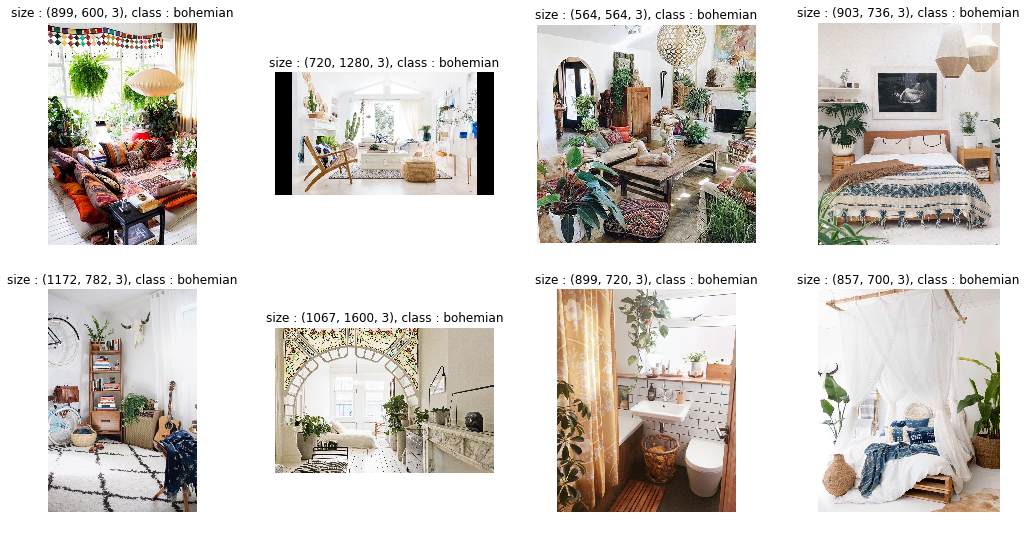

In [0]:
show_images(files, path/'bohemian', classes)

In [0]:
rnd = random.sample(list(os.listdir(path/'coastal')), 8)
files = rnd
classes = ['coastal' for _ in range(8)]

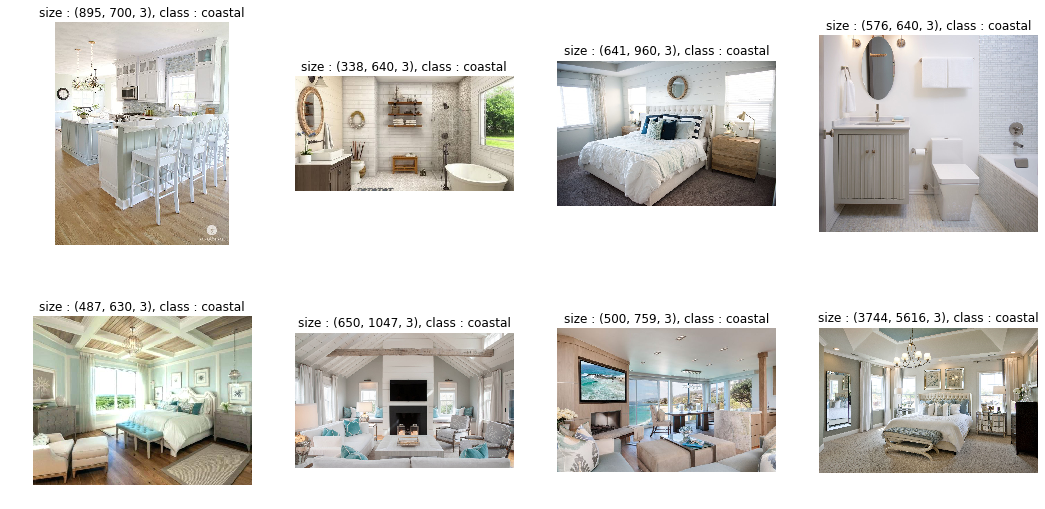

In [0]:
show_images(files, path/'coastal', classes)

In [0]:
rnd = random.sample(list(os.listdir(path/'industrial')), 8)
files = rnd
classes = ['industrial' for _ in range(8)]

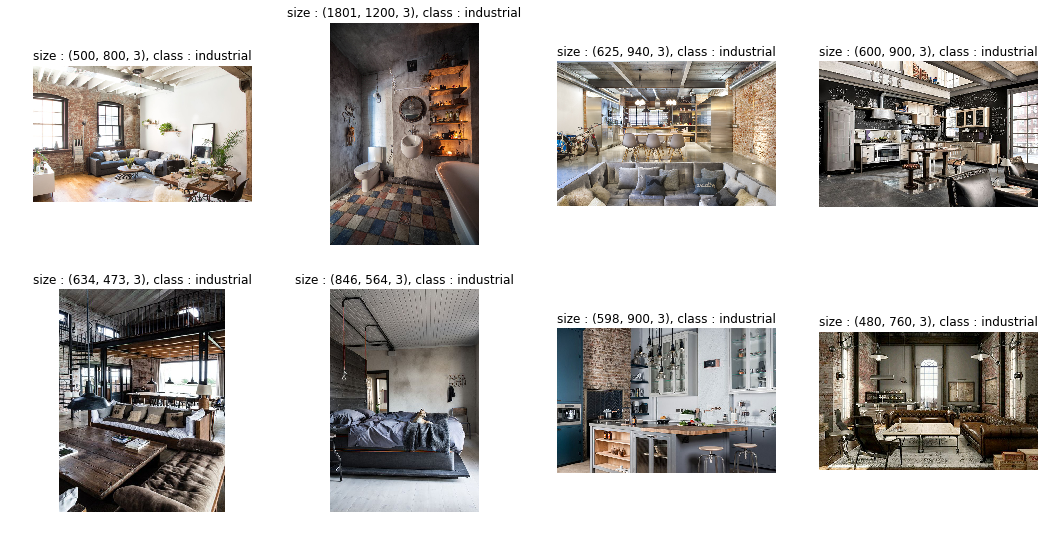

In [0]:
show_images(files, path/'industrial', classes)

In [0]:
rnd = random.sample(list(os.listdir(path/'Scandinavian')), 8)
files = rnd
classes = ['Scandinavian' for _ in range(8)]

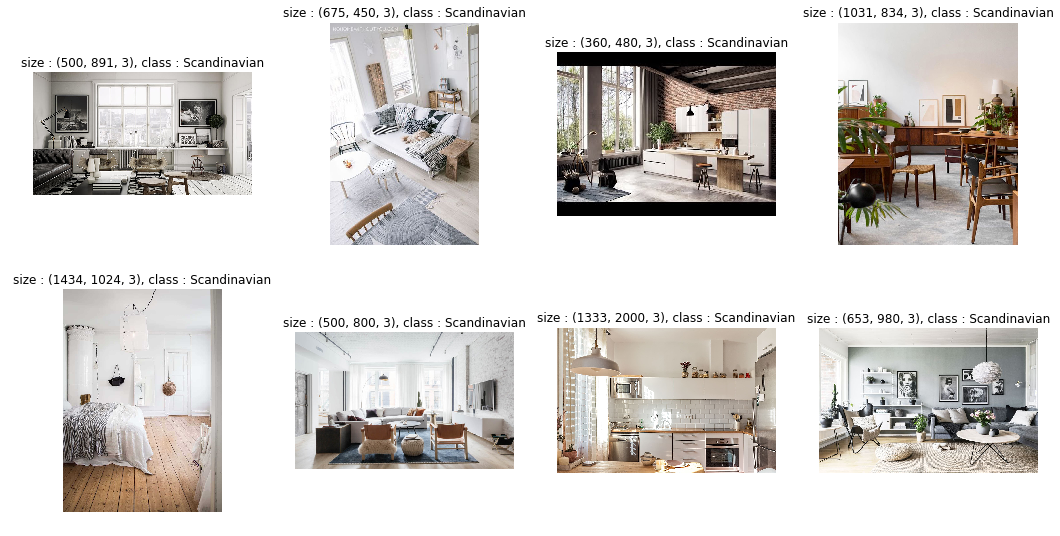

In [0]:
show_images(files, path/'Scandinavian', classes)

## Fastai

In [0]:
# import required fastai libraries

from fastai.vision import *
from fastai.callbacks import *
import numpy as np
import os

In [0]:
# path to dataset
path = Path('/content/data/').resolve()

In [0]:
# we will apply transformations such as lightining, zoom, changing brightness and
# changing contrast and resizing it to size 224 which is required for resnet50

tfms = get_transforms(do_flip=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.2)

# batch size
bs = 64

In [0]:
# fastai datablock where we split data into 20% validation and 80% training

src = (ImageList.from_folder(path) #define source of input
       .split_by_rand_pct(0.2)       #ratio of split
       .label_from_folder())           #grab the labels from name of folders

In [0]:
# create databunch

data = (src.transform(tfms, size=224, resize_method=ResizeMethod.SQUISH)  #resize images to 224
        .databunch(bs=bs)              #batch size=64
        .normalize(imagenet_stats))    #normalize data using imagenet mean, std

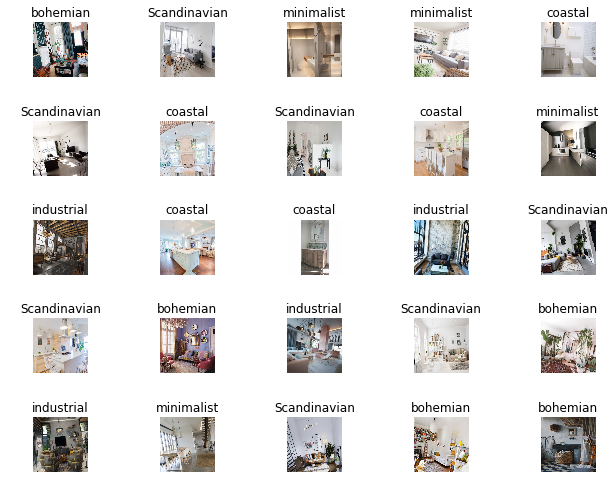

In [0]:
# show me sample images from dataset

data.show_batch(rows=5, figsize=(9, 7))

In [0]:
# print all the classes
print(data.classes)

['Scandinavian', 'bohemian', 'coastal', 'industrial', 'minimalist']


In [0]:
# and number of classes
print(len(data.classes))

5


(Category Scandinavian, Image (3, 860, 860), None)

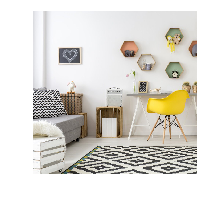

In [0]:
data.train_ds.y[0], data.train_ds.x[0], data.train_ds.x[0].show()

## Experiement 1 : Classes -> 5 Number of images -> 900

### Using Resnet 50

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


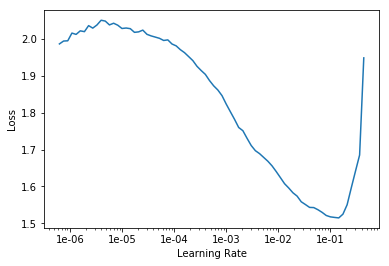

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

lr = 1e-2
learn.fit_one_cycle(7, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_1')])

Better model found at epoch 0 with accuracy value: 0.575129508972168.
Better model found at epoch 1 with accuracy value: 0.6891191601753235.
Better model found at epoch 2 with accuracy value: 0.7098445892333984.
Better model found at epoch 3 with accuracy value: 0.7253885865211487.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


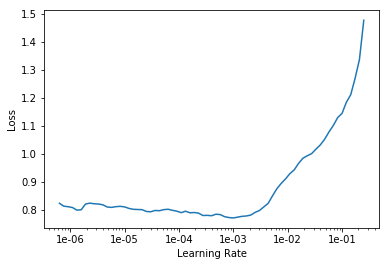

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs

learn.fit_one_cycle(10, slice(1e-5, 1e-3), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_2')])

Better model found at epoch 0 with accuracy value: 0.6994818449020386.
Better model found at epoch 1 with accuracy value: 0.7305699586868286.
Better model found at epoch 2 with accuracy value: 0.7927461266517639.
Better model found at epoch 9 with accuracy value: 0.803108811378479.


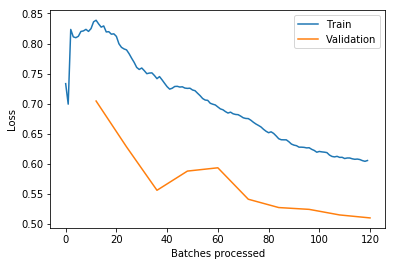

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
# load best model

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).load('resnet_224_2')

### Interplotion

In [0]:
# yay! show me what you learned
# tta is fancy method called test time augmentation

interp = ClassificationInterpretation.from_learner(learn, tta=True)

losses,idxs = interp.top_losses()

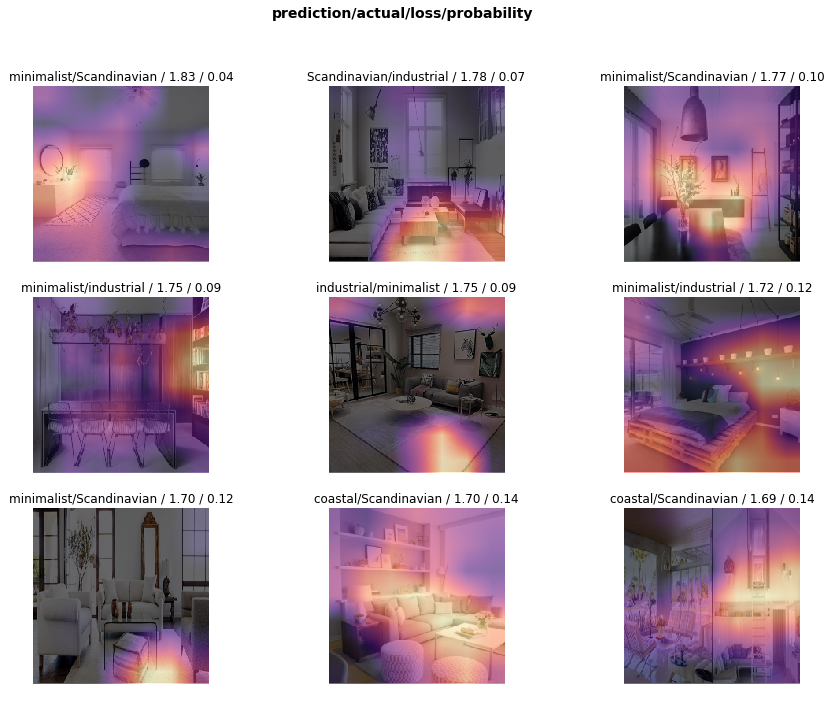

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

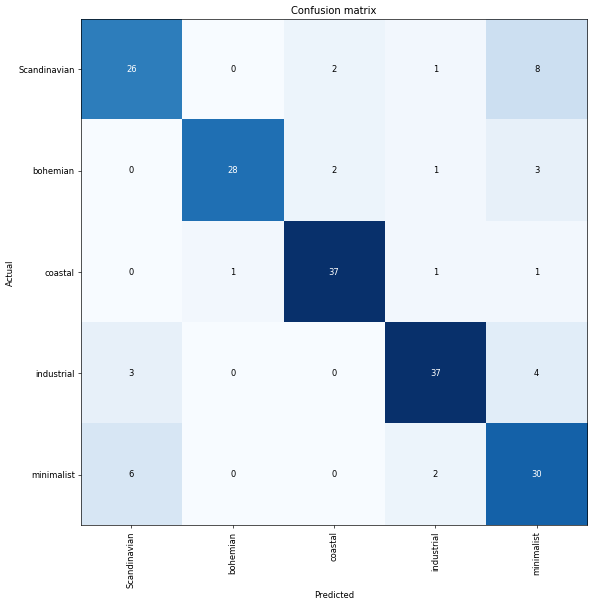

In [0]:
# how is the confusion in the confusion matrix?

interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [0]:
# where was the model more prone to make mistakes?
# which two classes are creating confusing more and more?

interp.most_confused(min_val=2)

[('Scandinavian', 'minimalist', 8),
 ('minimalist', 'Scandinavian', 6),
 ('industrial', 'minimalist', 4),
 ('bohemian', 'minimalist', 3),
 ('industrial', 'Scandinavian', 3),
 ('Scandinavian', 'coastal', 2),
 ('bohemian', 'coastal', 2),
 ('minimalist', 'industrial', 2)]

### Custom Images

In [0]:
! rm /content/*.jpg

In [0]:
!pip install wget

In [0]:
import wget

wget.download('https://d1hy6t2xeg0mdl.cloudfront.net/image/118654/7794978273/standard', 'img1.jpg')
wget.download('https://www.bing.com/th?id=OIP.a3o55zXaxZ-dzaOQ1bGxlAHaHa&pid=Api&rs=1&p=0', 'img2.jpg')
wget.download('https://www.bing.com/th?id=OIP.ogO1N6tRPprnNQHbDGmy-wHaE8&pid=Api&rs=1&p=0', 'img3.jpg')
wget.download('https://www.bing.com/th?id=OIP.33bGTd62Qo8ZLRB5tiYkuAHaE8&pid=Api&rs=1&p=0', 'img4.jpg')
wget.download('http://cdn.home-designing.com/wp-content/uploads/2017/05/minimalist-bedroom.jpg', 'img5.jpg')
wget.download('http://cdn.home-designing.com/wp-content/uploads/2015/09/scandinavian-living-room.jpg', 'img6.jpg')

'img6.jpg'

In [0]:
# create a test function which give the prediction of class for input test image
def test_image(image_path):
    img = open_image(image_path).resize(512)
    pred, pred_index, arr  = learn.predict(img)
    print(f'{data.classes[0]} : {arr[0]*100}, {data.classes[1]} : {arr[1]*100}, {data.classes[2]} : {arr[2]*100}, {data.classes[3]} : {arr[3]*100}, {data.classes[4]} : {arr[4]*100}')
    a = show_image(img)
#     a.set_title("Predicted: {}".format(str(pred[0])))

Scandinavian : 0.07167018204927444, bohemian : 0.8996118903160095, coastal : 0.5557642579078674, industrial : 94.28868865966797, minimalist : 4.184267520904541


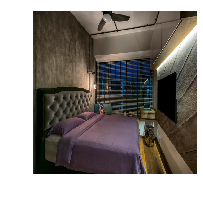

In [0]:
#Industrial
test_image('/content/img1.jpg')

Scandinavian : 0.00938479509204626, bohemian : 0.02589043788611889, coastal : 99.9280776977539, industrial : 0.016246475279331207, minimalist : 0.020401213318109512


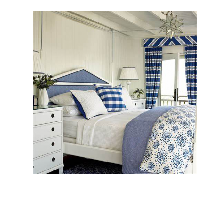

In [0]:
#Coastal
test_image('/content/img2.jpg')

Scandinavian : 0.1541314721107483, bohemian : 99.10859680175781, coastal : 0.3431420922279358, industrial : 0.27229297161102295, minimalist : 0.12183493375778198


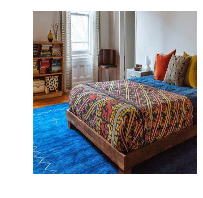

In [0]:
#Bohemian
test_image('/content/img3.jpg')

Scandinavian : 10.525711059570312, bohemian : 0.6560458540916443, coastal : 0.23148928582668304, industrial : 0.02588467113673687, minimalist : 88.56087493896484


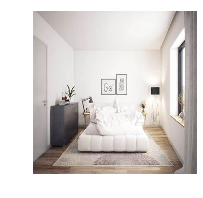

In [0]:
#Scandinavian
test_image('/content/img4.jpg')

Scandinavian : 6.711684703826904, bohemian : 0.9517732262611389, coastal : 0.562998354434967, industrial : 1.2935798168182373, minimalist : 90.4799575805664


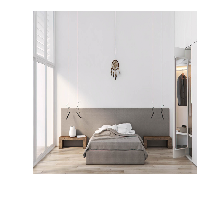

In [0]:
#minimalist
test_image('/content/img5.jpg')

Scandinavian : 96.2645492553711, bohemian : 0.06819059699773788, coastal : 0.04539482668042183, industrial : 0.41059163212776184, minimalist : 3.211287021636963


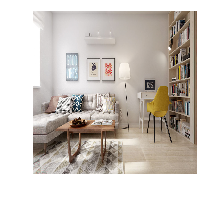

In [0]:
#Scandinavian
test_image('/content/img6.jpg')

## Experiement 2 : Classes -> 8 Number of images -> 1600

### Using Resnet 50

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).mixup()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 27809656.83it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


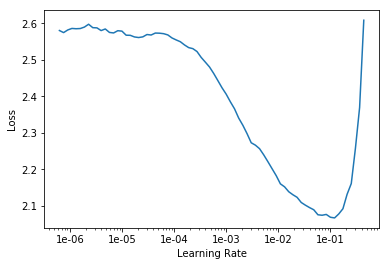

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

lr = 1e-2
learn.fit_one_cycle(7, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_1')])

Better model found at epoch 0 with accuracy value: 0.5351170301437378.
Better model found at epoch 2 with accuracy value: 0.5785953402519226.
Better model found at epoch 3 with accuracy value: 0.6086956262588501.
Better model found at epoch 4 with accuracy value: 0.6421404480934143.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


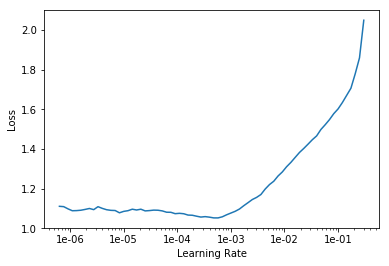

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs

learn.fit_one_cycle(10, slice(1e-5, 1e-4), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_2')])

Better model found at epoch 0 with accuracy value: 0.6521739363670349.
Better model found at epoch 1 with accuracy value: 0.6655518412590027.
Better model found at epoch 3 with accuracy value: 0.6722407937049866.
Better model found at epoch 6 with accuracy value: 0.6789297461509705.
Better model found at epoch 7 with accuracy value: 0.692307710647583.


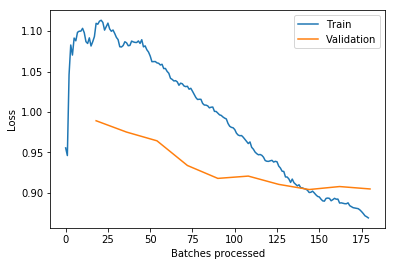

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
# load best model

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).load('resnet_224_2')

### Interplotion

In [0]:
# yay! show me what you learned
# tta is fancy method called test time augmentation

interp = ClassificationInterpretation.from_learner(learn, tta=True)

losses,idxs = interp.top_losses()

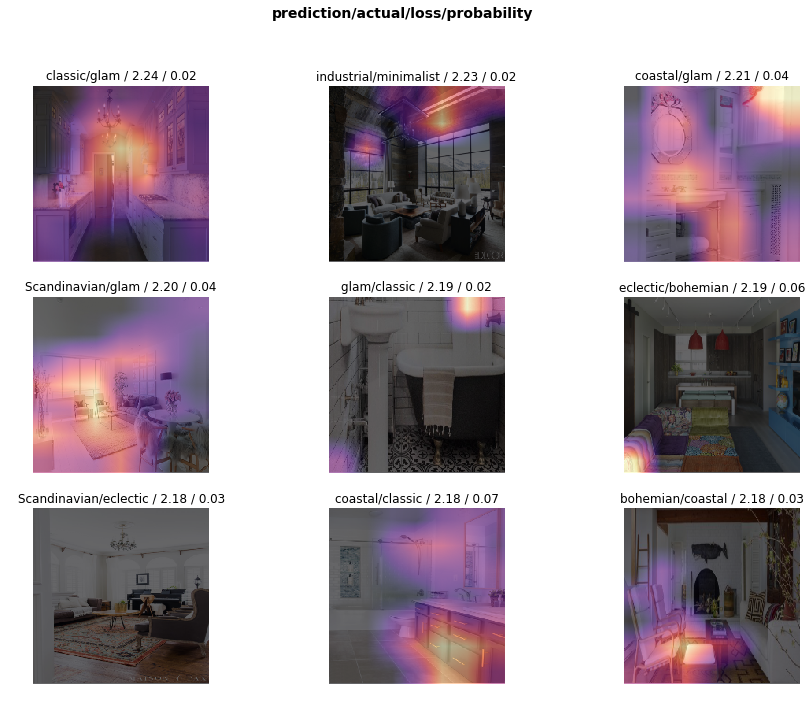

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

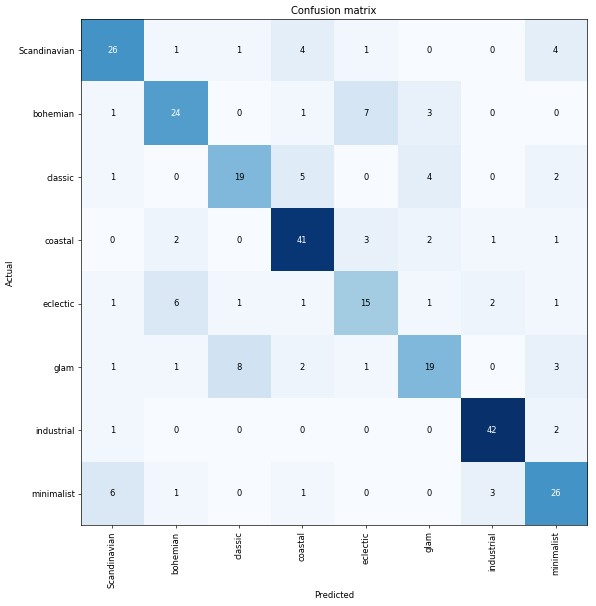

In [0]:
# how is the confusion in the confusion matrix?

interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [0]:
# where was the model more prone to make mistakes?
# which two classes are creating confusing more and more?

interp.most_confused(min_val=2)

[('glam', 'classic', 8),
 ('bohemian', 'eclectic', 7),
 ('eclectic', 'bohemian', 6),
 ('minimalist', 'Scandinavian', 6),
 ('classic', 'coastal', 5),
 ('Scandinavian', 'coastal', 4),
 ('Scandinavian', 'minimalist', 4),
 ('classic', 'glam', 4),
 ('bohemian', 'glam', 3),
 ('coastal', 'eclectic', 3),
 ('glam', 'minimalist', 3),
 ('minimalist', 'industrial', 3),
 ('classic', 'minimalist', 2),
 ('coastal', 'bohemian', 2),
 ('coastal', 'glam', 2),
 ('eclectic', 'industrial', 2),
 ('glam', 'coastal', 2),
 ('industrial', 'minimalist', 2)]

### Custom Images

In [0]:
! rm /content/*.jpg

In [0]:
!pip install wget

In [0]:
import wget

wget.download('https://d1hy6t2xeg0mdl.cloudfront.net/image/118654/7794978273/standard', 'img1.jpg')
wget.download('https://www.bing.com/th?id=OIP.a3o55zXaxZ-dzaOQ1bGxlAHaHa&pid=Api&rs=1&p=0', 'img2.jpg')
wget.download('https://www.bing.com/th?id=OIP.ogO1N6tRPprnNQHbDGmy-wHaE8&pid=Api&rs=1&p=0', 'img3.jpg')
wget.download('https://www.bing.com/th?id=OIP.33bGTd62Qo8ZLRB5tiYkuAHaE8&pid=Api&rs=1&p=0', 'img4.jpg')
wget.download('http://cdn.home-designing.com/wp-content/uploads/2017/05/minimalist-bedroom.jpg', 'img5.jpg')
wget.download('http://cdn.home-designing.com/wp-content/uploads/2015/09/scandinavian-living-room.jpg', 'img6.jpg')
wget.download('https://www.vimercatimeda.com/blog/wp-content/uploads/2014/11/classic-walnut-bedroom-2011.jpg', 'img7.jpg')
wget.download('https://i.pinimg.com/originals/45/8b/8d/458b8db530fe32138314355b9e4acc83.jpg', 'img8.jpg')
wget.download('https://www.bing.com/th?id=OIP.iFc_Y7K8oDD3mG22YgPBvgHaGD&pid=Api&rs=1&p=0', 'img9.jpg')




'img9.jpg'

In [0]:
# create a test function which give the prediction of class for input test image
def test_image(image_path):
    img = open_image(image_path).resize(512)
    pred, pred_index, arr  = learn.predict(img)
    print(f'{data.classes[0]} : {arr[0]*100}, {data.classes[1]} : {arr[1]*100}, {data.classes[2]} : {arr[2]*100}, {data.classes[3]} : {arr[3]*100}, {data.classes[4]} : {arr[4]*100}, {data.classes[5]} : {arr[5]*100},{data.classes[6]} : {arr[6]*100},{data.classes[7]} : {arr[7]*100}')
    a = show_image(img)
#     a.set_title("Predicted: {}".format(str(pred[0])))

Scandinavian : 1.2954497337341309, bohemian : 1.1382943391799927, classic : 14.687243461608887, coastal : 1.8978443145751953, eclectic : 13.887378692626953, glam : 9.569759368896484,industrial : 48.4607048034668,minimalist : 9.06332778930664


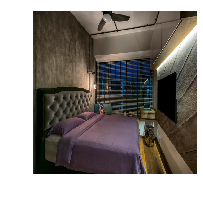

In [0]:
#Industrial
test_image('/content/img1.jpg')

Scandinavian : 0.010021612979471684, bohemian : 0.02204047702252865, classic : 0.045802436769008636, coastal : 99.68778228759766, eclectic : 0.08139674365520477, glam : 0.13106942176818848,industrial : 0.0008421713719144464,minimalist : 0.021054869517683983


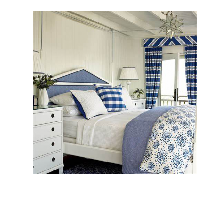

In [0]:
#Coastal
test_image('/content/img2.jpg')

Scandinavian : 0.05412358418107033, bohemian : 93.51695251464844, classic : 0.38649553060531616, coastal : 0.14959001541137695, eclectic : 5.391711711883545, glam : 0.014718763530254364,industrial : 0.22722665965557098,minimalist : 0.2591903507709503


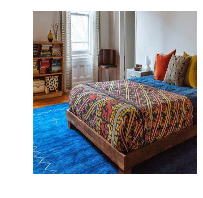

In [0]:
#Bohemian
test_image('/content/img3.jpg')

Scandinavian : 3.0372583866119385, bohemian : 0.07782593369483948, classic : 0.39131826162338257, coastal : 0.03831276297569275, eclectic : 0.19677779078483582, glam : 0.03832964971661568,industrial : 0.03108663111925125,minimalist : 96.1890869140625


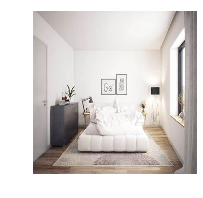

In [0]:
#Scandinavian
test_image('/content/img4.jpg')

Scandinavian : 8.246137619018555, bohemian : 1.1260091066360474, classic : 10.41469955444336, coastal : 0.9916211366653442, eclectic : 1.7774770259857178, glam : 0.17596761882305145,industrial : 1.778648853302002,minimalist : 75.48944091796875


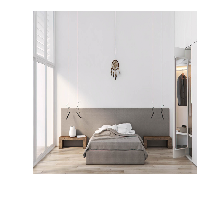

In [0]:
#minimalist
test_image('/content/img5.jpg')

Scandinavian : 92.92071533203125, bohemian : 0.030777666717767715, classic : 0.12286044657230377, coastal : 0.0826660767197609, eclectic : 0.12510628998279572, glam : 4.125646591186523,industrial : 0.6065444350242615,minimalist : 1.9856890439987183


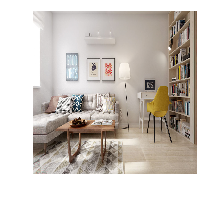

In [0]:
#Scandinavian
test_image('/content/img6.jpg')

Scandinavian : 0.012876031920313835, bohemian : 0.12081381678581238, classic : 99.47380065917969, coastal : 0.009051959030330181, eclectic : 0.18821963667869568, glam : 0.12384932488203049,industrial : 0.05331966280937195,minimalist : 0.01807098090648651


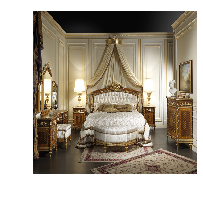

In [0]:
#classic
test_image('/content/img7.jpg')

Scandinavian : 2.3911657333374023, bohemian : 1.44349205493927, classic : 2.9352736473083496, coastal : 46.996246337890625, eclectic : 0.3668125569820404, glam : 39.66497039794922,industrial : 0.036391545087099075,minimalist : 6.165645122528076


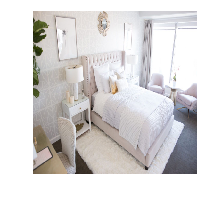

In [0]:
#glam
test_image('/content/img8.jpg')

Scandinavian : 1.4278078079223633, bohemian : 0.7979138493537903, classic : 0.7335250973701477, coastal : 3.2833549976348877, eclectic : 74.37882232666016, glam : 19.083789825439453,industrial : 0.11659473925828934,minimalist : 0.17819252610206604


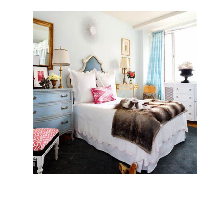

In [0]:
#eclectic
test_image('/content/img9.jpg')

## Experiement 3 : Classes -> 8 Number of images -> 4000

### Using Resnet 50

In [0]:
# create a resnet50 architecture with metrics like top-1 accuracy and top-5 accuracy

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).mixup()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 19660209.01it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


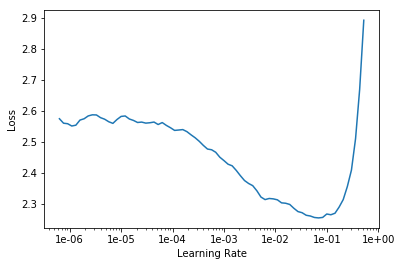

In [0]:
# Step 1: freeze and find learning rate, in this case we choose lr=1e-2

learn.lr_find()
learn.recorder.plot()

In [0]:
# using Cycle policy in super-convergence method, we fit using lr
# obtained from above result for 7 epochs

lr = 1e-2
learn.fit_one_cycle(7, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_1')])

Better model found at epoch 0 with accuracy value: 0.5093896985054016.
Better model found at epoch 1 with accuracy value: 0.5164319276809692.
Better model found at epoch 2 with accuracy value: 0.565727710723877.
Better model found at epoch 3 with accuracy value: 0.577464759349823.
Better model found at epoch 4 with accuracy value: 0.6068075299263.
Better model found at epoch 6 with accuracy value: 0.6173709034919739.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


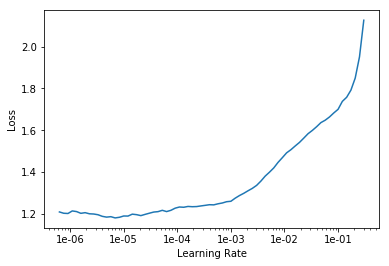

In [0]:
# Step 2: unfreeze and train

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
# using cycle policy in super-convergence method we train for 4 epochs

learn.fit_one_cycle(10, slice(1e-5, 1e-4), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_224_2')])

Better model found at epoch 0 with accuracy value: 0.6208920478820801.
Better model found at epoch 1 with accuracy value: 0.6232394576072693.
Better model found at epoch 3 with accuracy value: 0.6384976506233215.
Better model found at epoch 5 with accuracy value: 0.6455398797988892.
Better model found at epoch 7 with accuracy value: 0.6478873491287231.


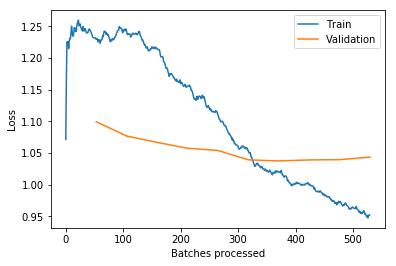

In [0]:
# plot the losses as we can see there is lot of noise in train
# that is due to training on mini-batches and it follows the
# expected trend of train loss less than validation loss 

learn.recorder.plot_losses()

In [0]:
# load best model

learn = cnn_learner(data, models.resnet50, metrics=[accuracy]).load('resnet_224_2')

### Interplotion

In [0]:
# yay! show me what you learned
# tta is fancy method called test time augmentation

interp = ClassificationInterpretation.from_learner(learn, tta=True)

losses,idxs = interp.top_losses()

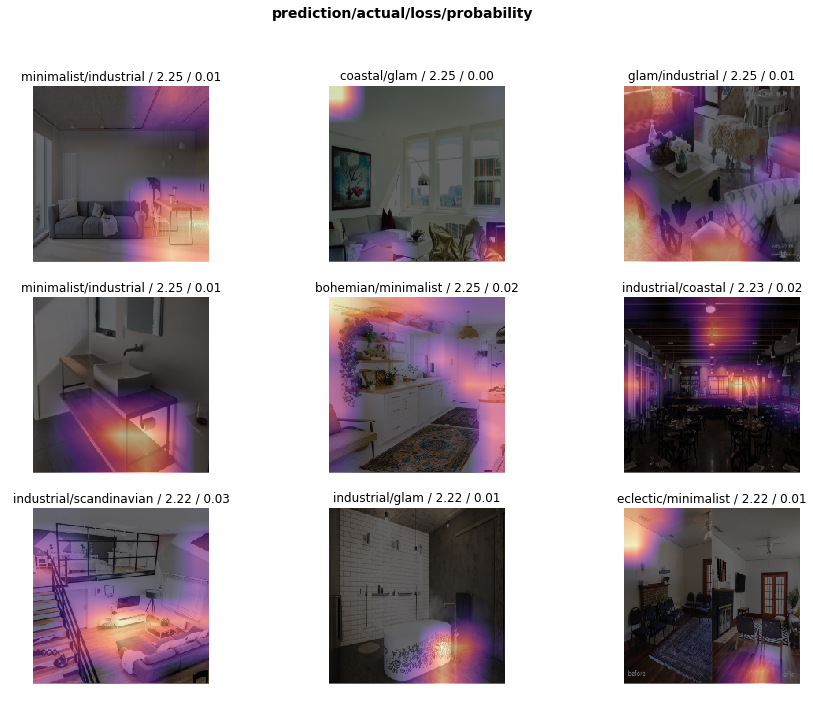

In [0]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

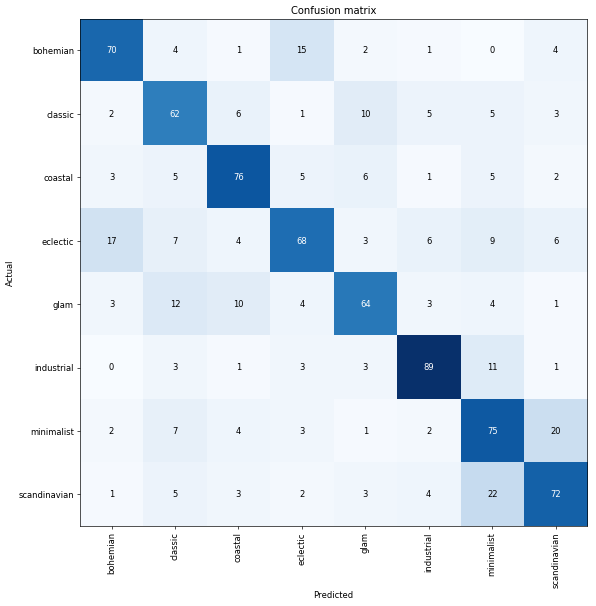

In [0]:
# how is the confusion in the confusion matrix?

interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [0]:
# where was the model more prone to make mistakes?
# which two classes are creating confusing more and more?

interp.most_confused(min_val=2)

[('scandinavian', 'minimalist', 22),
 ('minimalist', 'scandinavian', 20),
 ('eclectic', 'bohemian', 17),
 ('bohemian', 'eclectic', 15),
 ('glam', 'classic', 12),
 ('industrial', 'minimalist', 11),
 ('classic', 'glam', 10),
 ('glam', 'coastal', 10),
 ('eclectic', 'minimalist', 9),
 ('eclectic', 'classic', 7),
 ('minimalist', 'classic', 7),
 ('classic', 'coastal', 6),
 ('coastal', 'glam', 6),
 ('eclectic', 'industrial', 6),
 ('eclectic', 'scandinavian', 6),
 ('classic', 'industrial', 5),
 ('classic', 'minimalist', 5),
 ('coastal', 'classic', 5),
 ('coastal', 'eclectic', 5),
 ('coastal', 'minimalist', 5),
 ('scandinavian', 'classic', 5),
 ('bohemian', 'classic', 4),
 ('bohemian', 'scandinavian', 4),
 ('eclectic', 'coastal', 4),
 ('glam', 'eclectic', 4),
 ('glam', 'minimalist', 4),
 ('minimalist', 'coastal', 4),
 ('scandinavian', 'industrial', 4),
 ('classic', 'scandinavian', 3),
 ('coastal', 'bohemian', 3),
 ('eclectic', 'glam', 3),
 ('glam', 'bohemian', 3),
 ('glam', 'industrial', 3),
 (

### Custom Images

In [0]:
! rm /content/*.jpg

In [0]:
!pip install wget

In [0]:
import wget

wget.download('https://d1hy6t2xeg0mdl.cloudfront.net/image/118654/7794978273/standard', 'img1.jpg')
wget.download('https://www.bing.com/th?id=OIP.a3o55zXaxZ-dzaOQ1bGxlAHaHa&pid=Api&rs=1&p=0', 'img2.jpg')
wget.download('https://www.bing.com/th?id=OIP.ogO1N6tRPprnNQHbDGmy-wHaE8&pid=Api&rs=1&p=0', 'img3.jpg')
wget.download('https://www.bing.com/th?id=OIP.33bGTd62Qo8ZLRB5tiYkuAHaE8&pid=Api&rs=1&p=0', 'img4.jpg')
wget.download('http://cdn.home-designing.com/wp-content/uploads/2017/05/minimalist-bedroom.jpg', 'img5.jpg')
wget.download('http://cdn.home-designing.com/wp-content/uploads/2015/09/scandinavian-living-room.jpg', 'img6.jpg')
wget.download('https://www.vimercatimeda.com/blog/wp-content/uploads/2014/11/classic-walnut-bedroom-2011.jpg', 'img7.jpg')
wget.download('https://i.pinimg.com/originals/45/8b/8d/458b8db530fe32138314355b9e4acc83.jpg', 'img8.jpg')
wget.download('https://www.bing.com/th?id=OIP.iFc_Y7K8oDD3mG22YgPBvgHaGD&pid=Api&rs=1&p=0', 'img9.jpg')




'img9.jpg'

In [0]:
# create a test function which give the prediction of class for input test image
def test_image(image_path):
    img = open_image(image_path).resize(512)
    pred, pred_index, arr  = learn.predict(img)
    print(f'{data.classes[0]} : {arr[0]*100}, {data.classes[1]} : {arr[1]*100}, {data.classes[2]} : {arr[2]*100}, {data.classes[3]} : {arr[3]*100}, {data.classes[4]} : {arr[4]*100}, {data.classes[5]} : {arr[5]*100},{data.classes[6]} : {arr[6]*100},{data.classes[7]} : {arr[7]*100}')
    a = show_image(img)
#     a.set_title("Predicted: {}".format(str(pred[0])))

bohemian : 1.1561238765716553, classic : 5.152788162231445, coastal : 6.912474155426025, eclectic : 4.424293518066406, glam : 0.31347501277923584, industrial : 72.32192993164062,minimalist : 9.386402130126953,scandinavian : 0.332516074180603


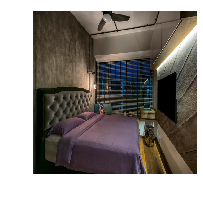

In [0]:
#Industrial
test_image('/content/img1.jpg')

bohemian : 0.35967227816581726, classic : 1.1369924545288086, coastal : 90.6911849975586, eclectic : 6.757842540740967, glam : 0.2991640567779541, industrial : 0.5190525054931641,minimalist : 0.11865445226430893,scandinavian : 0.1174432709813118


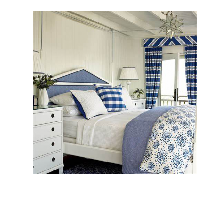

In [0]:
#Coastal
test_image('/content/img2.jpg')

bohemian : 83.96951293945312, classic : 0.14504049718379974, coastal : 0.671538233757019, eclectic : 14.449203491210938, glam : 0.05053144320845604, industrial : 0.28180602192878723,minimalist : 0.28471893072128296,scandinavian : 0.14763347804546356


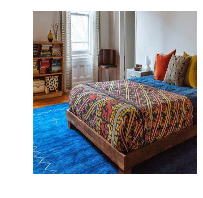

In [0]:
#Bohemian
test_image('/content/img3.jpg')

bohemian : 0.717380940914154, classic : 3.0112054347991943, coastal : 0.384184867143631, eclectic : 0.48470205068588257, glam : 3.0878424644470215, industrial : 0.3136098086833954,minimalist : 74.84843444824219,scandinavian : 17.15264129638672


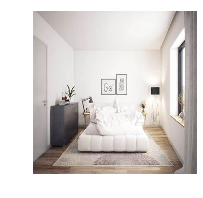

In [0]:
#Scandinavian
test_image('/content/img4.jpg')

bohemian : 1.51737380027771, classic : 5.268980979919434, coastal : 0.5819014310836792, eclectic : 0.8390755653381348, glam : 0.8356771469116211, industrial : 1.8430501222610474,minimalist : 52.80695724487305,scandinavian : 36.306983947753906


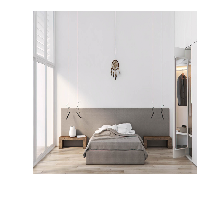

In [0]:
#minimalist
test_image('/content/img5.jpg')

bohemian : 0.2300834059715271, classic : 0.5040987133979797, coastal : 0.0574156753718853, eclectic : 2.4560797214508057, glam : 0.2540905475616455, industrial : 0.15380023419857025,minimalist : 1.4532471895217896,scandinavian : 94.89118194580078


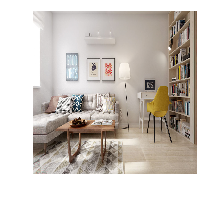

In [0]:
#Scandinavian
test_image('/content/img6.jpg')

bohemian : 2.2029476165771484, classic : 94.87506866455078, coastal : 0.14573843777179718, eclectic : 2.171734571456909, glam : 0.10786624252796173, industrial : 0.29781535267829895,minimalist : 0.08766817301511765,scandinavian : 0.11116359382867813


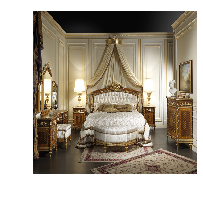

In [0]:
#classic
test_image('/content/img7.jpg')

bohemian : 0.05928677320480347, classic : 9.310785293579102, coastal : 6.629936218261719, eclectic : 0.26644405722618103, glam : 52.07377243041992, industrial : 0.16554944217205048,minimalist : 19.722143173217773,scandinavian : 11.772079467773438


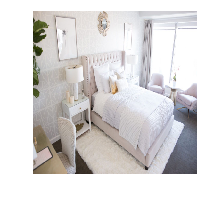

In [0]:
#glam
test_image('/content/img8.jpg')

bohemian : 3.1939070224761963, classic : 0.4383563995361328, coastal : 6.390560626983643, eclectic : 81.34056091308594, glam : 7.2264180183410645, industrial : 0.33915966749191284,minimalist : 0.4084637463092804,scandinavian : 0.662572979927063


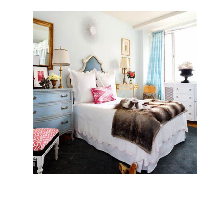

In [0]:
#eclectic
test_image('/content/img9.jpg')